<a href="https://colab.research.google.com/github/Tejaswini-1502/Crop_Yield_Prediction-ML/blob/main/Crop_Yield_Prediction_MLG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crop Yield Prediction**

## Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing the Dataset

In [ ]:
dataset_yield = pd.read_csv('/content/yield.csv')
dataset_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
dataset_yield.shape

(56717, 12)

In [ ]:
dataset_yield.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

In [ ]:
dataset_yield.rename(columns={"Value": "Yield","Area":"Country"},inplace=True)
dataset_yield.head()

,Domain Code,Domain,Area Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
dataset_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1,inplace=True)



In [ ]:
dataset_yield

,Country,Item,Year,Yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400
...,...,...,...,...
56712,Zimbabwe,Wheat,2012,24420
56713,Zimbabwe,Wheat,2013,22888
56714,Zimbabwe,Wheat,2014,21357
56715,Zimbabwe,Wheat,2015,19826


In [ ]:
dataset_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  56717 non-null  object
 1   Item     56717 non-null  object
 2   Year     56717 non-null  int64 
 3   Yield    56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


In [ ]:
dataset_rain = pd.read_csv('/content/rainfall.csv')
dataset_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [ ]:
dataset_rain = dataset_rain.rename(index=str, columns={" Area": 'Country'})

In [ ]:
dataset_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [ ]:

dataset_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(dataset_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
dataset_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [ ]:
#filling up the missing values in the column average_rain_fall_mm_per_year
dataset_rain['average_rain_fall_mm_per_year'].fillna(int(dataset_rain['average_rain_fall_mm_per_year'].mean()), inplace=True)


In [ ]:
dataset_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  6727 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [ ]:
dataset_rain.describe()

,Year,average_rain_fall_mm_per_year
count,6727.000000,6727.000000
mean,2001.354839,1124.657054
std,9.530114,739.262659
min,1985.000000,51.000000
25%,1993.000000,589.000000
50%,2001.000000,1118.000000
75%,2010.000000,1543.000000
max,2017.000000,3240.000000


In [ ]:
#Merge 1
# merge yield dataframe with rain dataframe by year and country columns 
dataset_final = pd.merge(dataset_yield, dataset_rain, on=['Year','Country'])

In [ ]:
dataset_final

,Country,Item,Year,Yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0
...,...,...,...,...,...
26100,Zimbabwe,"Rice, paddy",2016,22828,657.0
26101,Zimbabwe,Sorghum,2016,2688,657.0
26102,Zimbabwe,Soybeans,2016,12727,657.0
26103,Zimbabwe,Sweet potatoes,2016,22212,657.0


In [ ]:
dataset_final.shape

(26105, 5)

In [ ]:
dataset_final.describe()

,Year,Yield,average_rain_fall_mm_per_year
count,26105.000000,26105.000000,26105.000000
mean,2001.256311,68642.204827,1251.240797
std,9.150699,74867.915296,793.567098
min,1985.000000,0.000000,51.000000
25%,1994.000000,17740.000000,630.000000
50%,2001.000000,39310.000000,1130.000000
75%,2009.000000,95556.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


In [ ]:
dataset_pesticide = pd.read_csv('/content/pesticides.csv')
dataset_pesticide.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [ ]:
dataset_pesticide = dataset_pesticide.rename(index=str, columns={"Value": "Pesticides_tonnes","Area":"Country"})
dataset_pesticide = dataset_pesticide.drop(['Element','Domain','Unit','Item'], axis=1)
dataset_pesticide.head()

,Country,Year,Pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [ ]:
dataset_pesticide.describe()

,Year,Pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [ ]:
dataset_pesticide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   Pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [ ]:
#Merge 2
# merge Pesticides dataframe with dataset_final dataframe 
dataset_final = pd.merge(dataset_final, dataset_pesticide, on=['Year','Country'])
dataset_final.shape

(19356, 6)

In [ ]:
dataset_final.head()

,Country,Item,Year,Yield,average_rain_fall_mm_per_year,Pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [ ]:
dataset_temperature=  pd.read_csv('/content/temp.csv')

In [ ]:
dataset_temperature.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [ ]:
dataset_temperature.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [ ]:
dataset_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
dataset_temperature['avg_temp'].fillna(int(dataset_temperature['avg_temp'].mean()), inplace=True)

In [ ]:
dataset_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  71311 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
dataset_temperature = dataset_temperature.rename(index=str, columns={"year": "Year", "country":'Country'})
dataset_temperature.head()

,Year,Country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,16.00
4,1853,Côte D'Ivoire,16.00


In [ ]:
dataset_final = pd.merge(dataset_final,dataset_temperature, on=['Country','Year'])
dataset_final.head()

,Country,Item,Year,Yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
dataset_final.shape

(28248, 7)

In [ ]:
dataset_final.describe()

,Year,Yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
count,28248.000000,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,77047.863282,1149.050658,37069.136973,20.543722
std,7.052997,84950.194454,709.736854,59954.787836,6.311828
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19918.750000,593.000000,1695.710000,16.710000
50%,2001.000000,38295.000000,1083.000000,17517.760000,21.510000
75%,2008.000000,104598.250000,1668.000000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [ ]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        28248 non-null  object 
 1   Item                           28248 non-null  object 
 2   Year                           28248 non-null  int64  
 3   Yield                          28248 non-null  int64  
 4   average_rain_fall_mm_per_year  28248 non-null  float64
 5   Pesticides_tonnes              28248 non-null  float64
 6   avg_temp                       28248 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [ ]:
dataset_final.isnull().sum()

Country                          0
Item                             0
Year                             0
Yield                            0
average_rain_fall_mm_per_year    0
Pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
dataset_final.to_csv('/content/sample_data/crop_yield.csv')

Data Exploration

In [ ]:
dataset_final['Item'].value_counts()

Potatoes                4276
Maize                   4123
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2892
Cassava                 2047
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

In [ ]:
dataset_final['Country'].nunique()

101

In [ ]:
dataset_final['Country'].value_counts()

India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Latvia          42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: Country, Length: 101, dtype: int64

In [ ]:
type(dataset_final)

pandas.core.frame.DataFrame

In [ ]:
'Yield' in dataset_final

True

In [ ]:
dataset_final

,Country,Item,Year,Yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28243,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28244,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28245,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28246,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        28248 non-null  object 
 1   Item                           28248 non-null  object 
 2   Year                           28248 non-null  int64  
 3   Yield                          28248 non-null  int64  
 4   average_rain_fall_mm_per_year  28248 non-null  float64
 5   Pesticides_tonnes              28248 non-null  float64
 6   avg_temp                       28248 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


### Preprocessing

In [ ]:
# Dropping the 'Year' column

dataset_final.drop(['Year'],axis=1,inplace=True)

In [ ]:
# Encoding the columns 'Country' and 'Item'

dataset = pd.get_dummies(dataset_final,columns=['Country','Item'])

In [ ]:
dummy_yield = dataset.pop('Yield')
dataset.insert(114,'Yield',dummy_yield)

In [ ]:
dataset

,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chile,Country_Colombia,Country_Croatia,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Finland,Country_France,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,...,Country_Norway,Country_Pakistan,Country_Papua New Guinea,Country_Peru,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United Kingdom,Country_Uruguay,Country_Zambia,Country_Zimbabwe,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams,Yield
0,1485.0,121.00,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,36613
1,1485.0,121.00,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,66667
2,1485.0,121.00,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,23333
3,1485.0,121.00,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12500
4,1485.0,121.00,16.37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28243,657.0,2550.07,19.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,22581
28244,657.0,2550.07,19.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3066
28245,657.0,2550.07,19.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,13142
28246,657.0,2550.07,19.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,22222


In [ ]:
X = dataset.loc[:,dataset.columns!='Yield'].values
y = dataset['Yield'].values

In [ ]:
X

array([[1.48500e+03, 1.21000e+02, 1.63700e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.48500e+03, 1.21000e+02, 1.63700e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.48500e+03, 1.21000e+02, 1.63700e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [6.57000e+02, 2.55007e+03, 1.97600e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.57000e+02, 2.55007e+03, 1.97600e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.57000e+02, 2.55007e+03, 1.97600e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [ ]:
X.shape

(28248, 114)

In [ ]:
y

array([36613, 66667, 23333, ..., 13142, 22222, 22888])

In [ ]:
y.shape

(28248,)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.4733519 , -0.61627757, -0.66126579, ..., -0.33772155,
        -0.39765827, -0.17581604],
       [ 0.4733519 , -0.61627757, -0.66126579, ..., -0.33772155,
        -0.39765827, -0.17581604],
       [ 0.4733519 , -0.61627757, -0.66126579, ..., -0.33772155,
        -0.39765827, -0.17581604],
       ...,
       [-0.69329832, -0.57576182, -0.1241694 , ..., -0.33772155,
        -0.39765827, -0.17581604],
       [-0.69329832, -0.57576182, -0.1241694 , ...,  2.96101923,
        -0.39765827, -0.17581604],
       [-0.69329832, -0.57576182, -0.1241694 , ..., -0.33772155,
         2.51472201, -0.17581604]])

In [ ]:
# Splitting into training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

### Visualization

In [ ]:
dataset_final.value_counts()

Country  Item         Yield   average_rain_fall_mm_per_year  Pesticides_tonnes  avg_temp
India    Soybeans     10236   1083.0                         28707.01           26.55       4
         Maize        20238   1083.0                         28707.01           26.55       4
         Wheat        29071   1083.0                         28707.01           26.55       4
         Rice, paddy  32366   1083.0                         28707.01           26.55       4
         Cassava      343433  1083.0                         28707.01           26.55       4
                                                                                           ..
Malawi   Rice, paddy  19125   1181.0                         553.57             20.92       1
                      19174   1181.0                         1500.27            19.68       1
                      19237   1181.0                         173.19             20.40       1
                      19481   1181.0                         524.

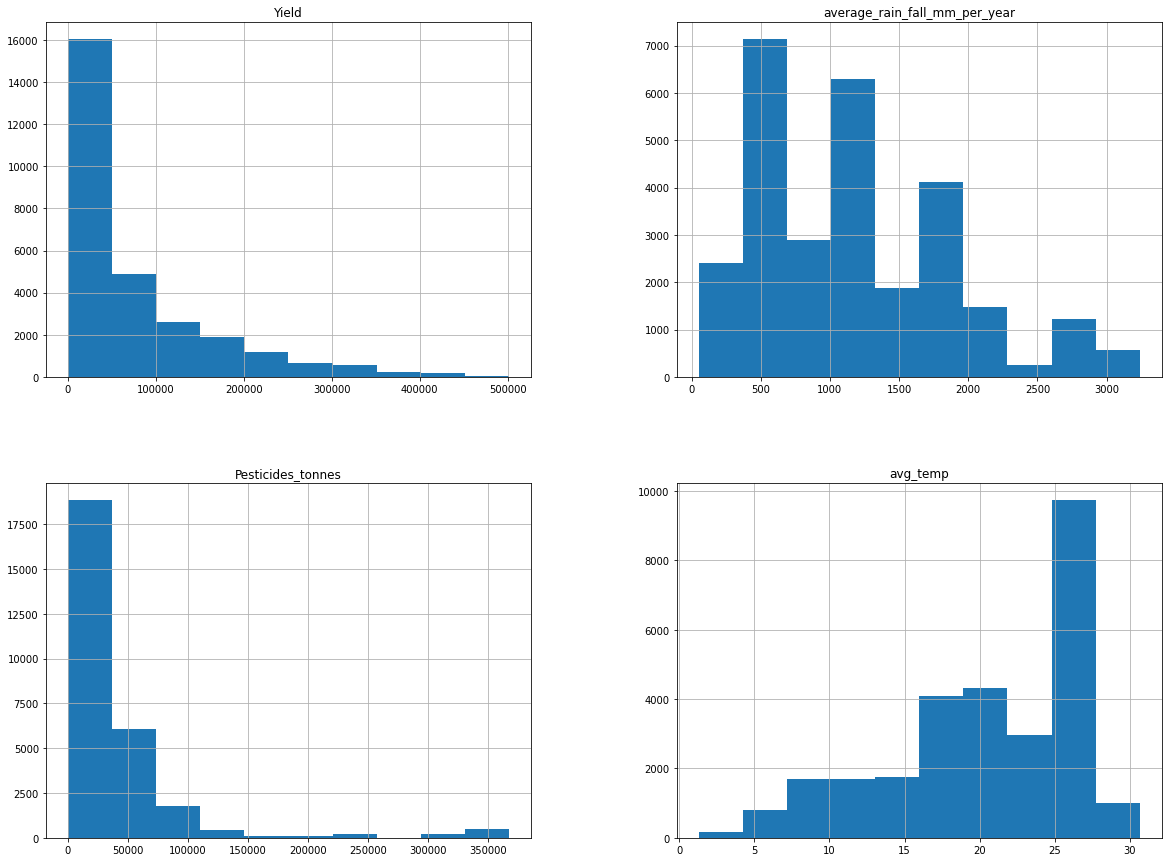

In [ ]:
dataset_final.hist(figsize=(20,15))
plt.show()

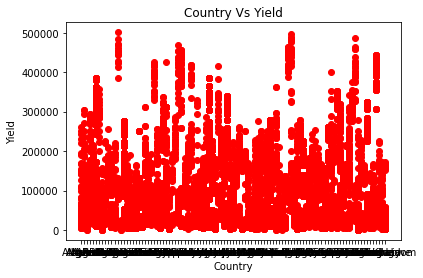

In [ ]:
plt.scatter(dataset_final['Country'], dataset_final['Yield'], color='red')
plt.title('Country Vs Yield')
plt.xlabel('Country')
plt.ylabel('Yield')
plt.show()

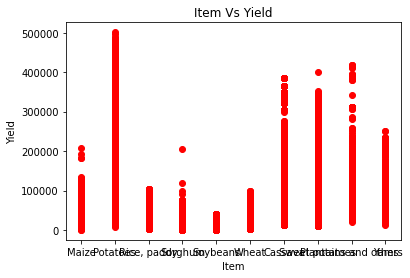

In [ ]:
plt.scatter(dataset_final['Item'], dataset_final['Yield'], color='red')
plt.title('Item Vs Yield')
plt.xlabel('Item')
plt.ylabel('Yield')
plt.show()

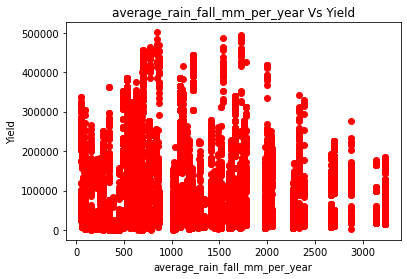

In [ ]:
plt.scatter(dataset_final['average_rain_fall_mm_per_year'], dataset_final['Yield'], color='red')
plt.title('average_rain_fall_mm_per_year Vs Yield')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('Yield')
plt.show()

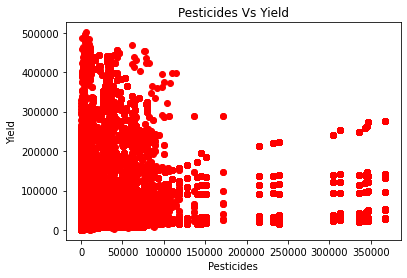

In [ ]:
plt.scatter(dataset_final['Pesticides_tonnes'], dataset_final['Yield'], color='red')
plt.title('Pesticides Vs Yield')
plt.xlabel('Pesticides')
plt.ylabel('Yield')
plt.show()

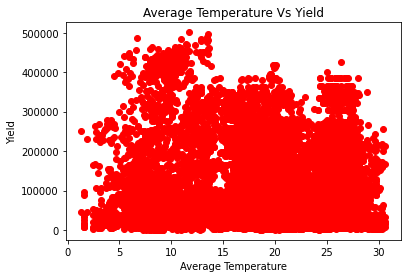

In [ ]:
plt.scatter(dataset_final['avg_temp'], dataset_final['Yield'], color='red')
plt.title('Average Temperature Vs Yield')
plt.xlabel('Average Temperature')
plt.ylabel('Yield')
plt.show()

## Applying Regression Models

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression  
linear_regressor= LinearRegression()  
linear_regressor.fit(X_train, y_train)  

LinearRegression()

In [ ]:
y_linear_pred = linear_regressor.predict(X_test)

In [ ]:
# Performance Measures

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE: ",mean_absolute_error(y_test,y_linear_pred))
print("MSE: ",mean_squared_error(y_test,y_linear_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_linear_pred)))
print("R2 score: ",r2_score(y_test,y_linear_pred))

MAE:  29422.908582189462
MSE:  1745079120.6333797
RMSE:  41774.14416398473
R2 score:  0.7490446048872546


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(max_depth=5)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_decision_pred = decision_regressor.predict(X_test)

In [ ]:
# Performance Measures

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE: ",mean_absolute_error(y_test,y_decision_pred))
print("MSE: ",mean_squared_error(y_test,y_decision_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_decision_pred)))
print("R2 score: ",r2_score(y_test,y_decision_pred))

MAE:  25182.705093279023
MSE:  1468953359.5794542
RMSE:  38326.92734331118
R2 score:  0.7887535491103362


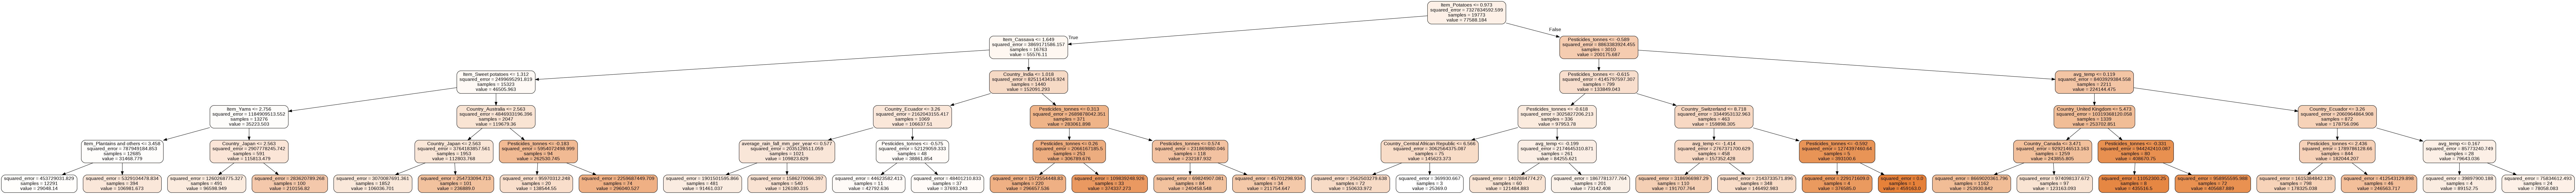

In [ ]:
# Visualizing the tree
from sklearn.tree import export_graphviz
export_graphviz(
decision_regressor,
out_file='crop_yield_tree.dot',
feature_names=dataset.columns[:-1],
class_names=dataset.columns[-1],
rounded=True,
filled=True)


! dot -Tpng crop_yield_tree.dot -o crop_yield_tree.png

from IPython.display import Image
Image (filename='crop_yield_tree.png')

### Support Vector Machine Regressor

In [ ]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf',C=100)
svr_regressor.fit(X_train, y_train)

SVR(C=100)

In [ ]:
y_svr_pred = svr_regressor.predict(X_test)

In [ ]:
# Performance Measures

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE: ",mean_absolute_error(y_test,y_svr_pred))
print("MSE: ",mean_squared_error(y_test,y_svr_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_svr_pred)))
print("R2 score: ",r2_score(y_test,y_svr_pred))

MAE:  48320.84480791194
MSE:  6942851160.24828
RMSE:  83323.77307976565
R2 score:  0.0015662123693835905


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state = 0,max_depth=5)
regressor.fit(X_train, y_train)  

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0)

In [ ]:
y_rf_pred = regressor.predict(X_test)

In [ ]:
# Performance Measures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE: ",mean_absolute_error(y_test,y_rf_pred))
print("MSE: ",mean_squared_error(y_test,y_rf_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_rf_pred)))
print("R2 score: ",r2_score(y_test,y_rf_pred))

MAE:  24225.4678570666
MSE:  1306286268.7117596
RMSE:  36142.5824853698
R2 score:  0.8121462902060677
